In [207]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set() # making the seaborn as default template for matplotlib



In [208]:
raw_data = pd.read_csv('Insurance.csv')
data = raw_data.copy()
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


# Preprocessing

### Exploring the descriptive statistics of the variables

In [209]:
data.describe(include = 'all')

# No missing value
# 3 numerical column beside 'charges'
# 3 categorical column

,age,sex,bmi,children,smoker,region,charges
count,1338.00,1338,1338.00,1338.00,1338,1338,1338.00
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.21,NaN,30.66,1.09,NaN,NaN,13270.42
std,14.05,NaN,6.10,1.21,NaN,NaN,12110.01
min,18.00,NaN,15.96,0.00,NaN,NaN,1121.87
25%,27.00,NaN,26.30,0.00,NaN,NaN,4740.29
50%,39.00,NaN,30.40,1.00,NaN,NaN,9382.03
75%,51.00,NaN,34.69,2.00,NaN,NaN,16639.91


In [210]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

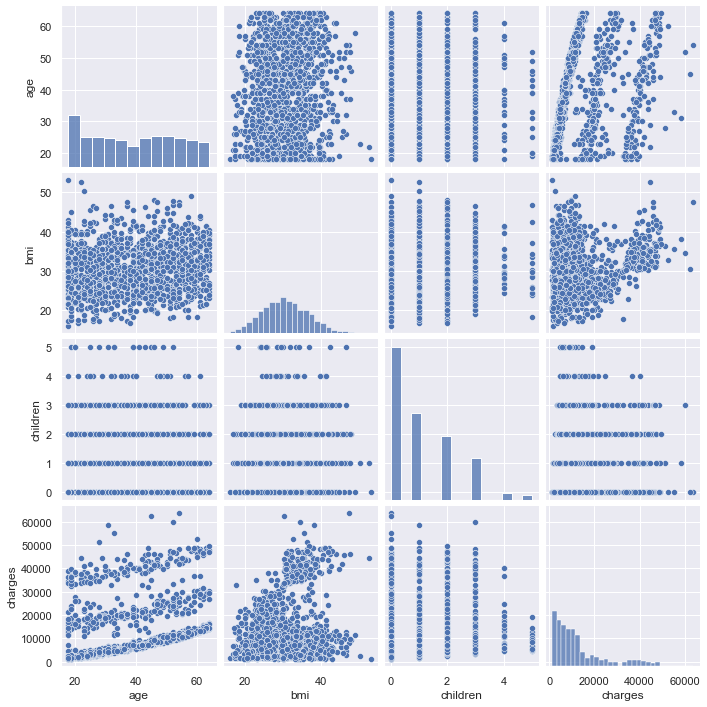

In [211]:
sns.pairplot(data)

### Checking the outliers in general

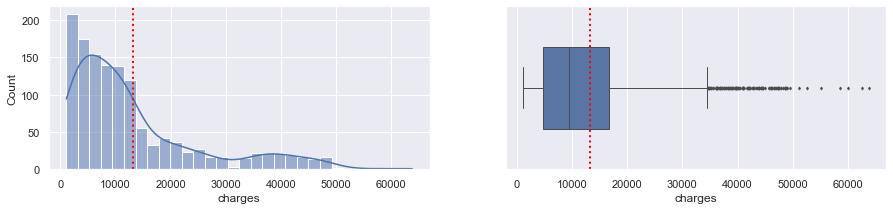

In [212]:
fig, ax = plt.subplots(1, 2, figsize= (15,3))
sns.histplot (x= data['charges'], kde= True, ax= ax[0])
sns.boxplot (x= data['charges'], showmeans= False, linewidth= 1, ax= ax[1], fliersize=2, width=0.5)
ax[0].axvline(x= data['charges'].mean(), ymax= 1, color= 'red',linestyle='dotted', linewidth=2)
ax[1].axvline(x= data['charges'].mean(), ymax= 1, color= 'red',linestyle='dotted', linewidth=2)


# Right skew graph


### Dealing with outliers


In [213]:
# It shows that it has many outlier, hence we need to remove 1% from its value

q = data['charges'].quantile(0.99)
data_q = data[data['charges']<q]

data_q

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


### Distribution of charges

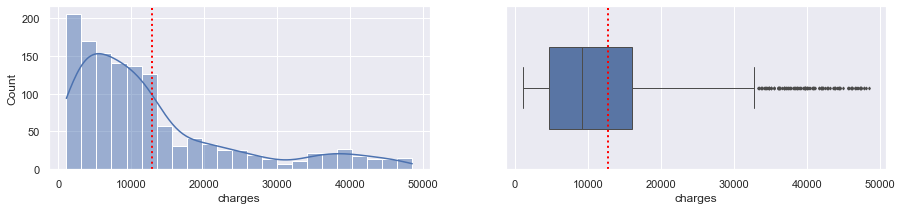

In [214]:
fig, ax = plt.subplots(1, 2, figsize= (15,3))
sns.histplot (x= data_q['charges'], kde= True, ax= ax[0])
sns.boxplot (x= data_q['charges'], showmeans= False, linewidth= 1, ax= ax[1], fliersize=2, width=0.5)
ax[0].axvline(x= data_q['charges'].mean(), ymax= 1, color= 'red',linestyle='dotted', linewidth=2)
ax[1].axvline(x= data_q['charges'].mean(), ymax= 1, color= 'red',linestyle='dotted', linewidth=2)

In [215]:
data_cleaned = data_q.reset_index(drop= True)

data_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1319,50,male,30.97,3,no,northwest,10600.55
1320,18,female,31.92,0,no,northeast,2205.98
1321,18,female,36.85,0,no,southeast,1629.83
1322,21,female,25.80,0,no,southwest,2007.94


### Numerical data (age, bmi, num. children) vs charges

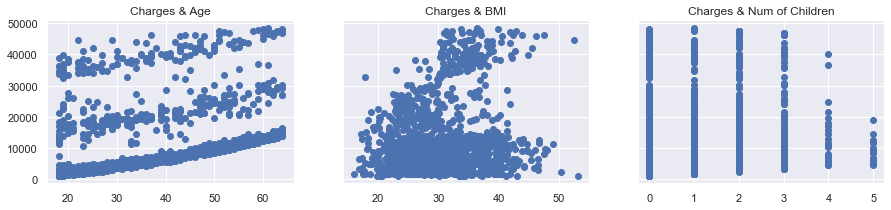

In [216]:
fig, ax = plt.subplots(1,3, sharey= True, figsize= (15,3))
ax[0].scatter (x= data_cleaned['age'],y= data_cleaned['charges'])
ax[0].set_title('Charges & Age')
ax[1].scatter (x= data_cleaned['bmi'],y= data_cleaned['charges'])
ax[1].set_title('Charges & BMI')
ax[2].scatter (x= data_cleaned['children'],y= data_cleaned['charges'])
ax[2].set_title('Charges & Num of Children')

plt.show()


### Converting charges column into its log_charges

In [217]:
# We know that the price distribution graph are in skew right
# We may transform it with narutal log value

log_charges= np.log(data_cleaned['charges'])
data_cleaned['log_charges']= log_charges

data_cleaned

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.90,0,yes,southwest,16884.92,9.73
1,18,male,33.77,1,no,southeast,1725.55,7.45
2,28,male,33.00,3,no,southeast,4449.46,8.40
3,33,male,22.70,0,no,northwest,21984.47,10.00
4,32,male,28.88,0,no,northwest,3866.86,8.26
...,...,...,...,...,...,...,...,...
1319,50,male,30.97,3,no,northwest,10600.55,9.27
1320,18,female,31.92,0,no,northeast,2205.98,7.70
1321,18,female,36.85,0,no,southeast,1629.83,7.40
1322,21,female,25.80,0,no,southwest,2007.94,7.60


### Distribution of log_charges

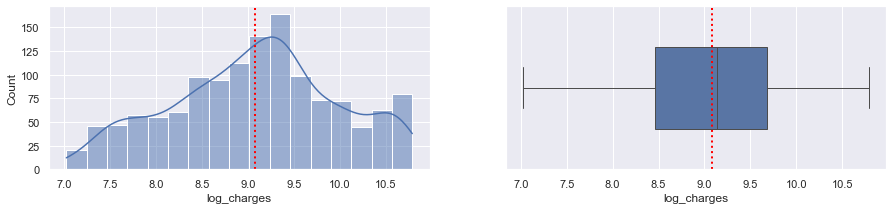

In [218]:
fig, ax = plt.subplots(1, 2, figsize= (15,3))
sns.histplot (x= data_cleaned['log_charges'], kde= True, ax= ax[0])
sns.boxplot (x= data_cleaned['log_charges'], showmeans= False, linewidth= 1, ax= ax[1], fliersize=2, width=0.5)
ax[0].axvline(x= data_cleaned['log_charges'].mean(), ymax= 1, color= 'red',linestyle='dotted', linewidth=2)
ax[1].axvline(x= data_cleaned['log_charges'].mean(), ymax= 1, color= 'red',linestyle='dotted', linewidth=2)

### Numerical data (age, bmi, num. children) vs log_charges

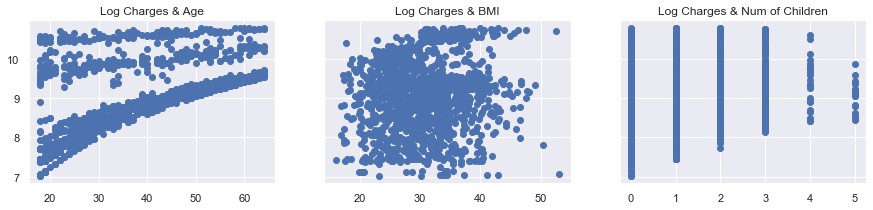

In [219]:
# plot the chart again with log charges value
fig, ax = plt.subplots(1,3, sharey= True, figsize= (15,3))
ax[0].scatter (x= data_cleaned['age'],y= data_cleaned['log_charges'])
ax[0].set_title('Log Charges & Age')
ax[1].scatter (x= data_cleaned['bmi'],y= data_cleaned['log_charges'])
ax[1].set_title('Log Charges & BMI')
ax[2].scatter (x= data_cleaned['children'],y= data_cleaned['log_charges'])
ax[2].set_title('Log Charges & Num of Children')

plt.show()


In [220]:
data_cleaned = data_cleaned.drop(['charges'], axis= 1)

In [221]:
data_cleaned

,age,sex,bmi,children,smoker,region,log_charges
0,19,female,27.90,0,yes,southwest,9.73
1,18,male,33.77,1,no,southeast,7.45
2,28,male,33.00,3,no,southeast,8.40
3,33,male,22.70,0,no,northwest,10.00
4,32,male,28.88,0,no,northwest,8.26
...,...,...,...,...,...,...,...
1319,50,male,30.97,3,no,northwest,9.27
1320,18,female,31.92,0,no,northeast,7.70
1321,18,female,36.85,0,no,southeast,7.40
1322,21,female,25.80,0,no,southwest,7.60


# Checking the multicollinearity

### Exclude the dependent variable : log_charges

In [222]:
# checking the multicollinearity
# checking the feature with high correlation
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['age','bmi','children']]
                    
vif_data= pd.DataFrame()
vif_data['VIF']= [vif(variables.values,i) for i in range(variables.shape[1])]
vif_data['Features']= variables.columns


In [223]:
# VIF : VIF= 1 --> no multicollinearity
# VIF : 1< VIF <5 --> perfectly okay
# VIF : VIF> 5 --> multicollinearity

vif_data

# age, and bmi has similar vif and pretty high thus we drop one of them
# it might due to number of people with high bmi is older

,VIF,Features
0,7.46,age
1,7.78,bmi
2,1.80,children


In [224]:
# it shows that both of age and bmi has high correlation with our variable of interest
# we should drop one of the column
# we decide to drop the bmi since in distribution graph it's totally a random
data_cleaned_no_mc= data_cleaned.drop(['bmi'], axis= 1)

data_cleaned_no_mc

,age,sex,children,smoker,region,log_charges
0,19,female,0,yes,southwest,9.73
1,18,male,1,no,southeast,7.45
2,28,male,3,no,southeast,8.40
3,33,male,0,no,northwest,10.00
4,32,male,0,no,northwest,8.26
...,...,...,...,...,...,...
1319,50,male,3,no,northwest,9.27
1320,18,female,0,no,northeast,7.70
1321,18,female,0,no,southeast,7.40
1322,21,female,0,no,southwest,7.60


### Categorical data (smoker, region, sex) vs log_charges

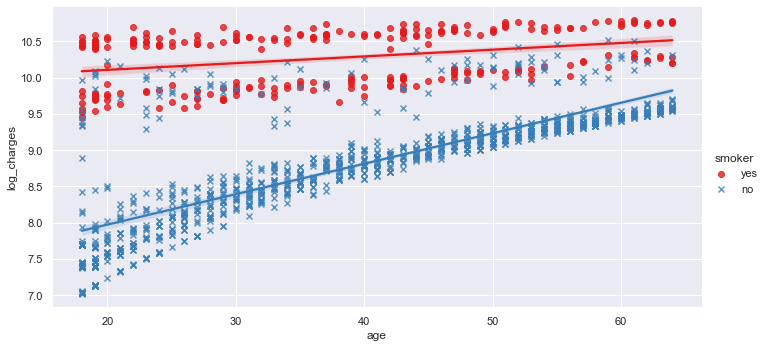

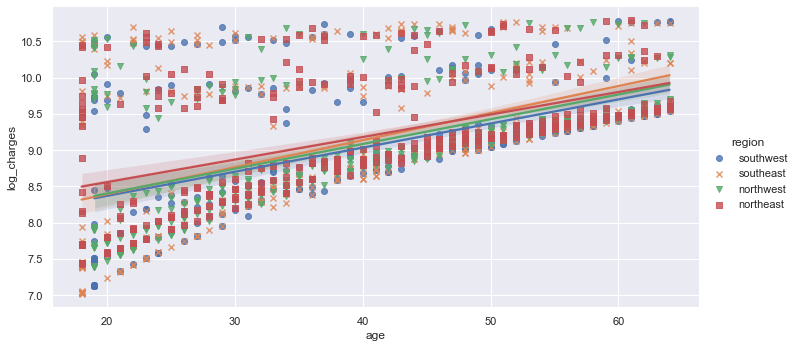

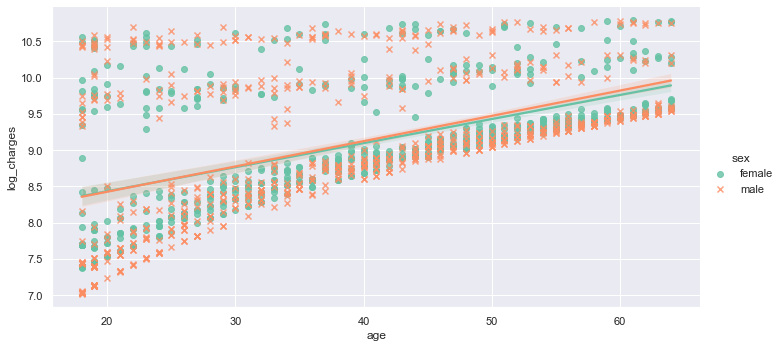

In [225]:
sns.lmplot(x='age', y='log_charges',
           hue='smoker', markers=['o', 'x'], palette="Set1", data=data_cleaned_no_mc, aspect=2)
sns.lmplot(x='age', y='log_charges',
           hue='region', markers=['o','x','v','s'], data=data_cleaned_no_mc, aspect=2)
sns.lmplot(x='age', y='log_charges',
           hue='sex', markers=['o', 'x'], palette="Set2", data=data_cleaned_no_mc, aspect=2)

# Create dummy variables

In [226]:
# we need to drop every first column in every categorical data to make it no multicollinear with others 
data_cleaned_no_mc_withdummies= pd.get_dummies(data_cleaned_no_mc, drop_first= True)

data_cleaned_no_mc_withdummies

,age,children,log_charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,0,9.73,0,1,0,0,1
1,18,1,7.45,1,0,0,1,0
2,28,3,8.40,1,0,0,1,0
3,33,0,10.00,1,0,1,0,0
4,32,0,8.26,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1319,50,3,9.27,1,0,1,0,0
1320,18,0,7.70,0,0,0,0,0
1321,18,0,7.40,0,0,0,1,0
1322,21,0,7.60,0,0,0,0,1


data_cleaned_no_mc_withdummies.columns.values

In [227]:
cols= ['log_charges','age', 'children', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest']

In [228]:
data_preprocessed = data_cleaned_no_mc_withdummies[cols]

data_preprocessed

,log_charges,age,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,9.73,19,0,0,1,0,0,1
1,7.45,18,1,1,0,0,1,0
2,8.40,28,3,1,0,0,1,0
3,10.00,33,0,1,0,1,0,0
4,8.26,32,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1319,9.27,50,3,1,0,1,0,0
1320,7.70,18,0,0,0,0,0,0
1321,7.40,18,0,0,0,0,1,0
1322,7.60,21,0,0,0,0,0,1


# Checking the OLS Summary Table - StatsModels

### Multiple variable results

In [229]:
y = data_preprocessed.loc[: ,'log_charges']
xx1 = data_preprocessed.loc[: , 'age':'region_southwest'] 


In [230]:
x = sm.add_constant(xx1)
results= sm.OLS(y,x).fit()

results.summary()

# prob (F-statistic) is p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_charges   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     577.0
Date:                Fri, 15 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:48:58   Log-Likelihood:                -818.10
No. Observations:                1324   AIC:                             1652.
Df Residuals:                    1316   BIC:                             1694.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.3833      0.046    159.847      0.000       7.293       7.474
age                  0.0354      0.001     39.982      0.000       0.034       0.037
children             0.1043      0.010     10.146      0.000       0.084       0.124
sex_male            -0.0651      0.025     -2.623      0.009      -0.114      -0.016
smoker_yes           1.5403      0.031     49.170      0.000       1.479       1.602
region_northwest    -0.0651      0.035     -1.835      0.067      -0.135       0.004
region_southeast    -0.1008      0.035     -2.910      0.004      -0.169      -0.033
region_southwest    -0.1113      0.036     -3.133      0.002      -0.181      -0.042
==============================================================================
Omnibus:                      452.852   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1584.113
Skew:                           1.667   Prob(JB):                         0.00
Kurtosis:                       7.196   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear Regression Model with sklearn

In [231]:
target = data_preprocessed['log_charges']
inputs = data_preprocessed.drop(['log_charges'], axis= 1)

### Scale the data

In [232]:
# to use machine learning model, it's really recommended to scale the data
# its actually not recommended to scale the dummy data, but in this case for machine learning purpose, scaling the dummy has no effect and hasn't affecting power
# once scaled, the dummy has no purpose anymore
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [233]:
inputs_scaled = scaler.transform(inputs)
inputs_scaled

pd.DataFrame(inputs_scaled)

,0,1,2,3,4,5,6
0,-1.43,-0.91,-1.01,2.02,-0.57,-0.61,1.76
1,-1.50,-0.08,0.99,-0.49,-0.57,1.65,-0.57
2,-0.79,1.58,0.99,-0.49,-0.57,1.65,-0.57
3,-0.43,-0.91,0.99,-0.49,1.76,-0.61,-0.57
4,-0.51,-0.91,0.99,-0.49,1.76,-0.61,-0.57
...,...,...,...,...,...,...,...
1319,0.78,1.58,0.99,-0.49,1.76,-0.61,-0.57
1320,-1.50,-0.91,-1.01,-0.49,-0.57,-0.61,-0.57
1321,-1.50,-0.91,-1.01,-0.49,-0.57,1.65,-0.57
1322,-1.29,-0.91,-1.01,-0.49,-0.57,-0.61,1.76


### Train Test Split

In [234]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size= 0.2, random_state= 380)

### Create the linear regression

In [235]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [236]:
reg.fit(x_train, y_train)

LinearRegression()

In [237]:
# this is where the x_train is tested
y_predict_linear = reg.predict(x_train) 

<function matplotlib.pyplot.show(close=None, block=None)>

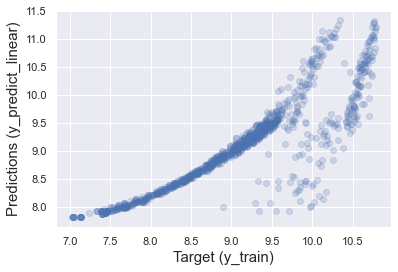

In [238]:
# checking the _train scatter line

plt.scatter(y_train, y_predict_linear, alpha= 0.2)
plt.xlabel('Target (y_train)', size = 15)
plt.ylabel('Predictions (y_predict_linear)', size = 15)
plt.show

### Checking the Residual Chart

Text(0.5, 1.0, 'Residual PDF')

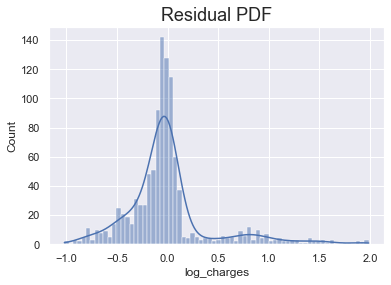

In [239]:
# error is zero mean
# error is not normally distributed
# there is much longer tail on positive side
# it means that the model tend to underestimate the target

sns.histplot((y_train - y_predict_linear), kde= True)
plt.title('Residual PDF',size=18)

eval_env: 1


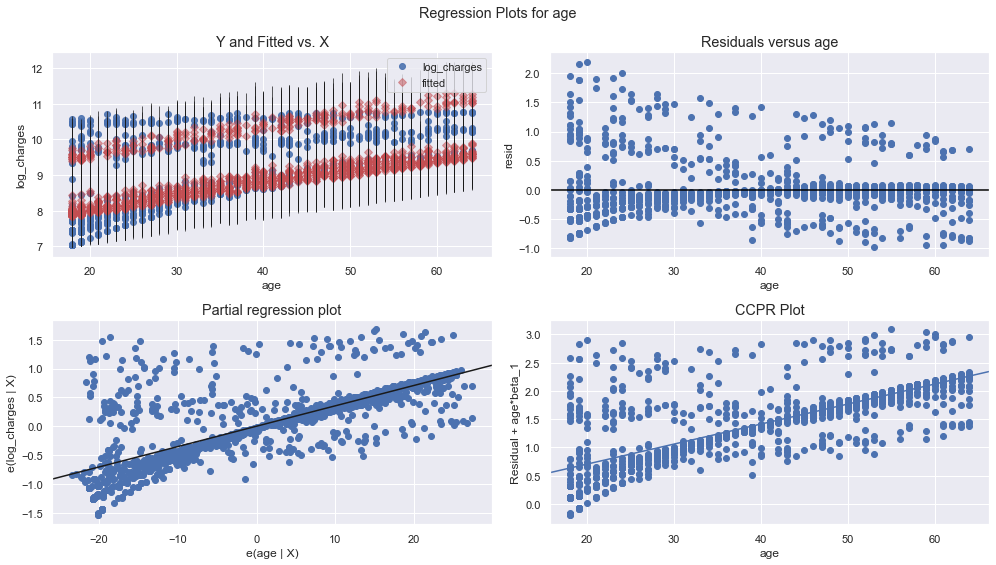

In [240]:
from statsmodels.formula.api import ols

# fit multi linear regression model
multi_model = ols('log_charges ~ age + children + sex_male + smoker_yes + region_northwest + region_southwest + region_southeast + region_southwest', data=data_preprocessed).fit()
  
# modify figure size
fig = plt.figure(figsize=(14, 8))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(multi_model, 'age', fig=fig)

### Finding the weight and bias

In [241]:
reg.score(x_train, y_train)

# 77% variablility of the data

0.7756572051001775

In [242]:
reg.intercept_

9.070108218693353

In [243]:
reg.coef_

array([ 0.50214881,  0.13170325, -0.05409082,  0.61620347, -0.02712534,
       -0.03624193, -0.04803686])

In [244]:
# dependend variable is still on logarithm value
# dummy variable is standarized

reg_summary = pd.DataFrame(inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_

reg_summary

,Features,Weights
0,age,0.50
1,children,0.13
2,sex_male,-0.05
3,smoker_yes,0.62
4,region_northwest,-0.03
5,region_southeast,-0.04
6,region_southwest,-0.05


# Testing

In [245]:
y_predict_linear_test = reg.predict(x_test)

<function matplotlib.pyplot.show(close=None, block=None)>

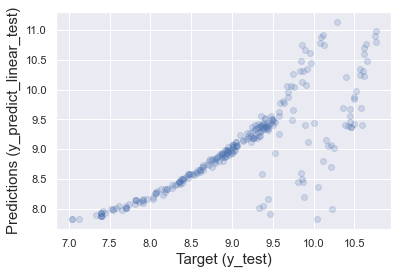

In [246]:
plt.scatter(y_test, y_predict_linear_test, alpha= 0.2)
plt.xlabel('Target (y_test)', size = 15)
plt.ylabel('Predictions (y_predict_linear_test)', size = 15)
plt.show

In [247]:
y_test = y_test.reset_index(drop= True)

data_performance = pd.DataFrame(np.exp(y_predict_linear_test),columns=['Predictions'])
data_performance['Target'] = np.exp(y_test)
data_performance.head(5)

,Predictions,Target
0,15080.96,14451.84
1,10816.34,11093.62
2,6882.44,6402.29
3,6825.57,6184.30
4,10577.81,9715.84


In [248]:
data_performance['Residual']= data_performance['Target'] - data_performance['Predictions']

In [249]:
data_performance.describe()

,Predictions,Target,Residual
count,265.00,265.00,265.00
mean,11513.68,12469.24,955.56
std,11297.25,10591.63,8558.16
min,2489.02,1135.94,-39885.65
25%,4807.04,4931.65,-773.16
50%,7990.30,9225.26,-310.35
75%,12164.73,15359.10,569.74
max,69216.63,47269.85,27554.15


In [250]:
data_performance['Difference%'] = np.absolute(data_performance['Residual']/data_performance['Target']*100)
data_performance.describe()

# 50% of the data has difference only 10%, 
# 75% of the data has difference 44%, Q3-Q2 has increased the difference by 34% 

,Predictions,Target,Residual,Difference%
count,265.00,265.00,265.00,265.00
mean,11513.68,12469.24,955.56,26.77
std,11297.25,10591.63,8558.16,30.80
min,2489.02,1135.94,-39885.65,0.00
25%,4807.04,4931.65,-773.16,5.03
50%,7990.30,9225.26,-310.35,10.75
75%,12164.73,15359.10,569.74,44.27
max,69216.63,47269.85,27554.15,144.32


In [251]:
# showing more rows
pd.options.display.max_rows=999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data_performance.sort_values(['Difference%'])
data_performance.sort_values(['Target'])

# It tends to have big error diff when the Target is on lowest charges area

,Predictions,Target,Residual,Difference%
101,2489.02,1135.94,-1353.08,119.12
98,2489.02,1141.45,-1347.58,118.06
176,2502.78,1242.82,-1259.97,101.38
221,2688.64,1526.31,-1162.32,76.15
82,2627.97,1621.34,-1006.63,62.09
47,2627.97,1628.47,-999.50,61.38
29,2773.40,1629.83,-1143.57,70.16
65,2773.40,1631.67,-1141.73,69.97
140,2627.97,1632.04,-995.94,61.02
5,2773.40,1633.04,-1140.36,69.83
